# NECESSARY LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from warnings import filterwarnings
filterwarnings("ignore")

# Loading the dataset and performing initial data exploration

In [2]:
data=pd.read_excel("customer_churn_large_dataset.xlsx")

In [3]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
data.dtypes


CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [5]:
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

# Data Visualization

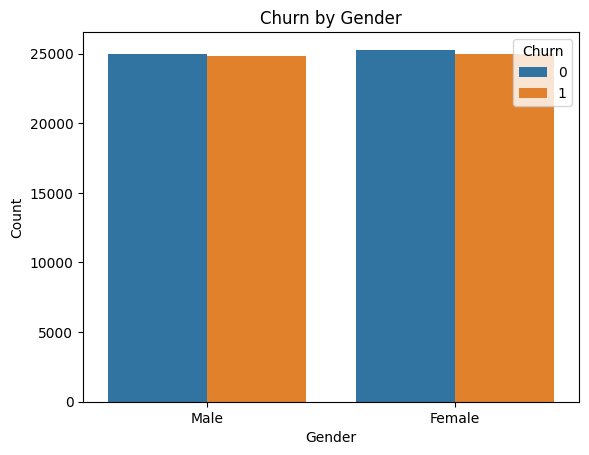

In [6]:
sn.countplot(data=data, x="Gender", hue="Churn")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Churn by Gender")
plt.show()

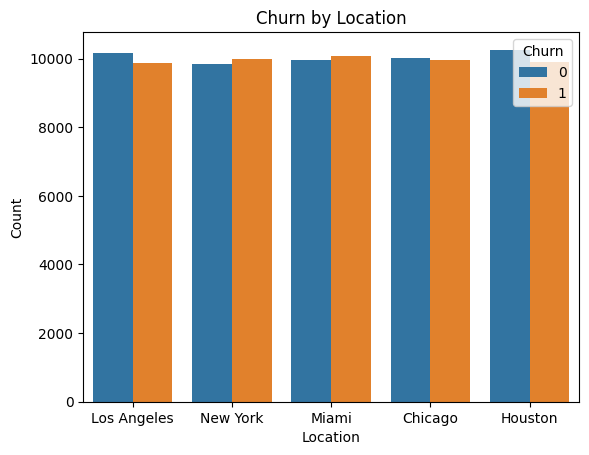

In [7]:
sn.countplot(data=data, x="Location", hue="Churn")
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Churn by Location")
plt.show()

In [8]:

data[(data["Total_Usage_GB"] >= 400) & (data["Churn"] == 0)]# there are 11254 people


,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
10,11,Customer_11,50,Female,Miami,5,88.49,442,0
20,21,Customer_21,58,Female,Houston,2,49.56,429,0
39,40,Customer_40,26,Male,Miami,1,46.16,495,0
63,64,Customer_64,64,Male,Houston,10,73.94,459,0
...,...,...,...,...,...,...,...,...,...
99961,99962,Customer_99962,20,Female,Los Angeles,21,30.03,425,0
99966,99967,Customer_99967,68,Female,Miami,19,42.83,428,0
99974,99975,Customer_99975,27,Male,New York,7,46.50,400,0
99979,99980,Customer_99980,34,Male,New York,1,43.19,472,0


In [26]:
data["Gender"].unique()

array([1, 0])

In [9]:

data[(data["Total_Usage_GB"] >= 400) & (data["Churn"] == 1)]# THERE ARE ONLY 11007

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
5,6,Customer_6,67,Male,New York,15,82.65,456,1
29,30,Customer_30,53,Male,Los Angeles,19,93.91,456,1
37,38,Customer_38,36,Male,New York,17,47.22,423,1
50,51,Customer_51,38,Female,New York,7,44.73,411,1
51,52,Customer_52,25,Female,Chicago,14,38.28,447,1
...,...,...,...,...,...,...,...,...,...
99953,99954,Customer_99954,69,Female,Houston,21,97.06,421,1
99963,99964,Customer_99964,19,Female,Chicago,2,30.64,414,1
99970,99971,Customer_99971,19,Male,Los Angeles,1,32.27,439,1
99978,99979,Customer_99979,65,Female,Houston,10,55.25,488,1


In [10]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


# FEATURE Engineering

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [12]:
lb=LabelEncoder()
data["Gender"]=lb.fit_transform(data["Gender"])
data["Location"]=lb.fit_transform(data["Location"])

In [13]:
df=data[["Age","Gender","Location","Subscription_Length_Months","Monthly_Bill","Total_Usage_GB","Churn"]]

In [131]:
df

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,2,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,1,1,23,55.13,226,1
99996,62,0,4,19,61.65,351,0
99997,64,1,0,17,96.11,251,1
99998,51,0,4,20,49.25,434,1


In [14]:
min_max=MinMaxScaler()
columns_to_scale = ["Subscription_Length_Months", "Monthly_Bill","Total_Usage_GB"]
df[columns_to_scale] = min_max.fit_transform(df[columns_to_scale])



In [15]:
df

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,0.695652,0.619429,0.413333,0
1,62,0,4,0.000000,0.268000,0.271111,0
2,24,0,2,0.173913,0.792429,0.911111,0
3,36,0,3,0.086957,0.970571,0.548889,1
4,46,0,3,0.782609,0.402000,0.480000,0
...,...,...,...,...,...,...,...
99995,33,1,1,0.956522,0.359000,0.391111,1
99996,62,0,4,0.782609,0.452143,0.668889,0
99997,64,1,0,0.695652,0.944429,0.446667,1
99998,51,0,4,0.826087,0.275000,0.853333,1


# Model Building

In [16]:
X=df.drop("Churn",axis=1)


In [17]:
y=df["Churn"]

In [18]:
X

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,1,2,0.695652,0.619429,0.413333
1,62,0,4,0.000000,0.268000,0.271111
2,24,0,2,0.173913,0.792429,0.911111
3,36,0,3,0.086957,0.970571,0.548889
4,46,0,3,0.782609,0.402000,0.480000
...,...,...,...,...,...,...
99995,33,1,1,0.956522,0.359000,0.391111
99996,62,0,4,0.782609,0.452143,0.668889
99997,64,1,0,0.695652,0.944429,0.446667
99998,51,0,4,0.826087,0.275000,0.853333


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=142)

In [139]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score
import datetime
from sklearn.model_selection import GridSearchCV


In [140]:
names=["GradientBoostingClassifier", "RandomForestClassifier", "SVC","XGBClassifier","LGBMClassifier"]
models=[GradientBoostingClassifier,RandomForestClassifier,SVC,XGBClassifier,LGBMClassifier]

In [141]:
for i in range(0,len(models)):
    model = models[i]()
    start = datetime.datetime.now()
    model.fit(X_train,y_train)
    end = datetime.datetime.now()
    time = end-start
    print(f"MOdel Name used is {names[i]}")
    print("Traning accuracy : ",accuracy_score(y_train,model.predict(X_train)))
    print("Testing accuracy : ",accuracy_score(y_test,model.predict(X_test)))
    print("F1 SCORE:" ,f1_score(y_test, model.predict(X_test)))
    print(f"time Taken for this {names[i]} is {time.seconds}")
    print("\n\n\n")

MOdel Name used is GradientBoostingClassifier
Traning accuracy :  0.5354375
Testing accuracy :  0.4947
F1 SCORE: 0.44920427294528015
time Taken for this GradientBoostingClassifier is 10




MOdel Name used is RandomForestClassifier
Traning accuracy :  1.0
Testing accuracy :  0.49455
F1 SCORE: 0.4806042233982428
time Taken for this RandomForestClassifier is 16




MOdel Name used is SVC
Traning accuracy :  0.5024625
Testing accuracy :  0.5012
F1 SCORE: 0.0
time Taken for this SVC is 229




MOdel Name used is XGBClassifier
Traning accuracy :  0.65005
Testing accuracy :  0.50495
F1 SCORE: 0.4931142169661598
time Taken for this XGBClassifier is 1




MOdel Name used is LGBMClassifier
Traning accuracy :  0.6015375
Testing accuracy :  0.49925
F1 SCORE: 0.4673722278359836
time Taken for this LGBMClassifier is 0






In [ ]:
model=LGBMClassifier()
param_grid={ "n_estimators": [100, 200, 300],  
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 4, 5],  
    'min_child_samples': [10, 20, 30], 
    'colsample_bytree': [0.6, 0.8, 1.0]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

In [152]:
model_lite=LGBMClassifier(colsample_bytree=1,learning_rate=0.01,max_depth=3,min_child_samples=20,n_estimators=200)
model_lite.fit(X_train,y_train)
print("Traning accuracy : ",accuracy_score(y_train,model_lite.predict(X_train)))
print("Testing accuracy : ",accuracy_score(y_test,model_lite.predict(X_test)))
print("F1 SCORE:" ,f1_score(y_test, model_lite.predict(X_test)))

Traning accuracy :  0.5187
Testing accuracy :  0.49985
F1 SCORE: 0.4366728614067692


In [22]:
import tensorflow as tf
from tensorflow import keras

In [23]:
model = keras.Sequential([
   keras.layers.Dense(units=20, input_shape=(6,), activation="relu"),
    keras.layers.Dense(units=15, activation="relu"),
    keras.layers.Dense(units=20, activation="relu"),
    keras.layers.Dropout(0.3),  # Adding dropout for regularization
    keras.layers.Dense(units=1, activation="sigmoid")
])



model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train,y_train,epochs=200)

Epoch 1/200
2500/2500 [==============================] - 3s 762us/step - loss: 0.6964 - accuracy: 0.5000
Epoch 2/200
2500/2500 [==============================] - 2s 759us/step - loss: 0.6932 - accuracy: 0.5026
Epoch 3/200
2500/2500 [==============================] - 2s 831us/step - loss: 0.6932 - accuracy: 0.5008
Epoch 4/200
2500/2500 [==============================] - 2s 784us/step - loss: 0.6932 - accuracy: 0.5021
Epoch 5/200
2500/2500 [==============================] - 2s 776us/step - loss: 0.6932 - accuracy: 0.5015
Epoch 6/200
2500/2500 [==============================] - 2s 784us/step - loss: 0.6932 - accuracy: 0.5005
Epoch 7/200
2500/2500 [==============================] - 2s 800us/step - loss: 0.6932 - accuracy: 0.5023
Epoch 8/200
2500/2500 [==============================] - 2s 778us/step - loss: 0.6932 - accuracy: 0.5001
Epoch 9/200
2500/2500 [==============================] - 2s 772us/step - loss: 0.6932 - accuracy: 0.4990
Epoch 10/200
2500/2500 [==============================]

2500/2500 [==============================] - 2s 785us/step - loss: 0.6932 - accuracy: 0.4976
Epoch 79/200
2500/2500 [==============================] - 2s 781us/step - loss: 0.6932 - accuracy: 0.5001
Epoch 80/200
2500/2500 [==============================] - 2s 791us/step - loss: 0.6932 - accuracy: 0.5007
Epoch 81/200
2500/2500 [==============================] - 2s 805us/step - loss: 0.6932 - accuracy: 0.5026
Epoch 82/200
2500/2500 [==============================] - 2s 866us/step - loss: 0.6932 - accuracy: 0.5013
Epoch 83/200
2500/2500 [==============================] - 2s 910us/step - loss: 0.6932 - accuracy: 0.5009
Epoch 84/200
2500/2500 [==============================] - 2s 807us/step - loss: 0.6932 - accuracy: 0.5016
Epoch 85/200
2500/2500 [==============================] - 2s 827us/step - loss: 0.6932 - accuracy: 0.5029
Epoch 86/200
2500/2500 [==============================] - 2s 809us/step - loss: 0.6932 - accuracy: 0.5021
Epoch 87/200
2500/2500 [==============================] - 2

2500/2500 [==============================] - 2s 812us/step - loss: 0.6932 - accuracy: 0.5000
Epoch 155/200
2500/2500 [==============================] - 2s 808us/step - loss: 0.6932 - accuracy: 0.4992
Epoch 156/200
2500/2500 [==============================] - 2s 813us/step - loss: 0.6932 - accuracy: 0.5021
Epoch 157/200
2500/2500 [==============================] - 2s 796us/step - loss: 0.6932 - accuracy: 0.5021
Epoch 158/200
2500/2500 [==============================] - 2s 858us/step - loss: 0.6932 - accuracy: 0.5019
Epoch 159/200
2500/2500 [==============================] - 2s 821us/step - loss: 0.6932 - accuracy: 0.5000
Epoch 160/200
2500/2500 [==============================] - 2s 896us/step - loss: 0.6932 - accuracy: 0.5008
Epoch 161/200
2500/2500 [==============================] - 2s 807us/step - loss: 0.6932 - accuracy: 0.5002
Epoch 162/200
2500/2500 [==============================] - 2s 798us/step - loss: 0.6932 - accuracy: 0.5015
Epoch 163/200
2500/2500 [==========================

In [24]:
model.evaluate(X_test,y_test)

625/625 [==============================] - 1s 613us/step - loss: 0.6931 - accuracy: 0.5012


[0.6931455731391907, 0.5012000203132629]

In [25]:
model.save('model.h5')

In [155]:
import pickle as pk


In [156]:
pk.dump(model, open('model.pkl', 'wb'))

In [157]:
pk.dump(lb, open('label.pkl', 'wb'))

In [158]:
pk.dump(min_max, open('min_max.pkl', 'wb'))

# tried other model to increase accuracy


In [145]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV



In [146]:
def create_model(units_1=20, units_2=15, units_3=20, dropout_rate=0.3, optimizer='adam'):
    model = Sequential()
    model.add(Dense(units=units_1, input_shape=(6,), activation='relu'))
    model.add(Dense(units=units_2, activation='relu'))
    model.add(Dense(units=units_3, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [147]:
dl_model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

In [148]:
param_dist = {
    'units_1': [10, 20, 30],
    'units_2': [10, 20, 30],
    'units_3': [10, 20, 30],
    'dropout_rate': [0.0, 0.2, 0.3, 0.4],
    'optimizer': ['adam', 'sgd', 'rmsprop']
}

In [149]:
random_search = RandomizedSearchCV(dl_model, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', verbose=2)
random_search.fit(X_train, y_train)  # X_train and y_train should be your training data

# Print the best hyperparameters and their corresponding accuracy
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
834/834 [==============================] - 1s 1ms/step
[CV] END dropout_rate=0.0, optimizer=sgd, units_1=30, units_2=20, units_3=30; total time=  26.3s
834/834 [==============================] - 1s 1ms/step
[CV] END dropout_rate=0.0, optimizer=sgd, units_1=30, units_2=20, units_3=30; total time=  22.5s
834/834 [==============================] - 1s 1ms/step
[CV] END dropout_rate=0.0, optimizer=sgd, units_1=30, units_2=20, units_3=30; total time=  22.5s
834/834 [==============================] - 1s 1ms/step
[CV] END dropout_rate=0.2, optimizer=adam, units_1=10, units_2=20, units_3=20; total time=  25.3s
834/834 [==============================] - 1s 1ms/step
[CV] END dropout_rate=0.2, optimizer=adam, units_1=10, units_2=20, units_3=20; total time=  24.9s
834/834 [==============================] - 1s 1ms/step
[CV] END dropout_rate=0.2, optimizer=adam, units_1=10, units_2=20, units_3=20; total time=  25.2s
834/834 [===============

In [150]:
model = keras.Sequential([
   keras.layers.Dense(units=20, input_shape=(6,), activation="relu"),
    keras.layers.Dense(units=10, activation="relu"),
    keras.layers.Dense(units=30, activation="relu"),
     keras.layers.Dense(units=10, activation="relu"),
    keras.layers.Dense(units=30, activation="relu"),
    keras.layers.Dense(units=1, activation="sigmoid")
])



model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train,y_train,epochs=10,batch_size=32,verbose=0)

In [151]:
model.evaluate(X_test,y_test)

625/625 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5012


[0.6931477785110474, 0.5012000203132629]

In [84]:
from sklearn.linear_model import LogisticRegression

In [87]:
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)
y_pred = model_lr.predict(X_test)

In [88]:
accuracy_score(y_test,y_pred)

0.4982

In [97]:
df[df["Churn"]==0].count()

Age                           50221
Gender                        50221
Location                      50221
Subscription_Length_Months    50221
Monthly_Bill                  50221
Total_Usage_GB                50221
Churn                         50221
dtype: int64